# 정렬

## index이름, column 이름을 기준으로 정렬

-   <b style='font-size:1.2em'>sort_index(axis=0, ascending=True, inplace=False)</b>
    -   axis
        -   index 이름 기준 정렬(행) : 'index' 또는 0 (기본값)
        -   column 이름 기준 정렬(열) : 'columns' 또는 1
    -   ascending
        -   정렬방식
        -   True(기본): 오름차순, False: 내림차순
    -   inplace
        -   원본에 적용 여부
        -   False(기본): 변경한 복사본 반환
        -   True : 원본을 변경
-   Index name을 정렬하면 앞의 몇글자만 가지고 slicing을 할 수 있다.
    -   ex) A로 시작하는 것에서 C로 시작하는 것 까지
    -   단 결측치(NA) 값이 index name에 있으면 안된다.


In [2]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv("data/movie.csv", index_col="movie_title")
df.shape

(4916, 27)

In [ ]:
# 컬럼 이름을 기준으로 정렬
df.sort_index(axis=1)

In [ ]:
#내림차순
df.sort_index(axis=1, ascending=False) 

In [ ]:
# index name (행 이름) 기준 정렬
df.sort_index()

In [ ]:
# 내림차순
df.sort_index(ascending=False)

In [ ]:
# method chain을 이용해 행, 열 이름으로 정렬
df.sort_index().sort_index(axis=1)

In [ ]:
# 행이름 정렬 후 시작부분일치 slicing 조회
df.head(10)

In [ ]:
df.loc['Avatar':'John Carter']

In [ ]:
df2 = df.sort_index() # 행 정렬

In [ ]:
df2.loc['A' : 'Jb']  # A ~ J전까지 

## 특정 컬럼(열)의 값을 기준으로 정렬

-   <b style='font-size:1.2em'>sort_values(by, ascending, inplace)</b>
    -   by
        -   **정렬 기준 컬럼이름**을 문자열로 지정
        -   여러 컬럼에 대해 정렬할 경우 리스트에 담아 전달
    -   ascending
        -   정렬방식
        -   True(기본): 오름차순, False: 내림차순
        -   여러 컬럼에 대해 정렬할 경우 정렬방식도 리스트에 담아 전달
    -   inplace
        -   원본에 적용 여부
        -   False(기본): 변경한 복사본 반환
        -   True : 원본을 변경
    -   결측치는 방식과 상관없이 마지막에 나온다.


In [ ]:
df.sort_values(by="duration").head(10)

In [ ]:
df.sort_values('director_name', ascending=False).head(10) 

In [ ]:
df.sort_values(by=["duration", "movie_facebook_likes"])[["duration", "movie_facebook_likes"]].head(15)

In [ ]:
df.sort_values(by=["duration", "movie_facebook_likes"], ascending=[True, False])[["duration", "movie_facebook_likes"]].head(15)

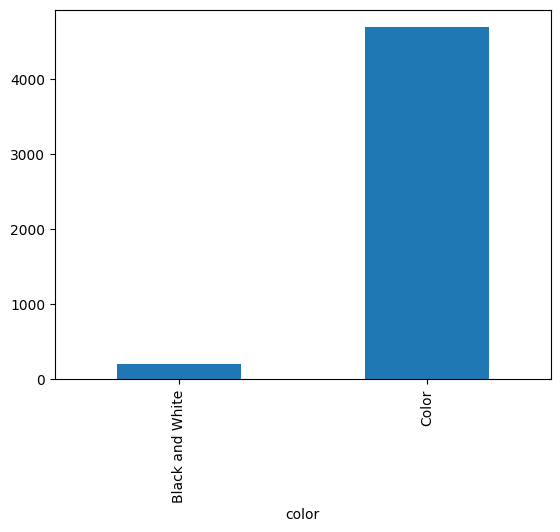

In [ ]:
df['color'].value_counts().sort_values().plot(kind='bar')

In [ ]:
result_df = df.query('duration > 250').sort_values("duration", ascending=False)[['duration', 'director_name']]
result_df

# flights.csv (항공기 운항 기록 데이터)

-   MONTH : 비행 월
-   DAY : 비행 일
-   WEEKDAY : 비행 요일 - 1(월요일)~7(일요일)
-   AIRLINE : 항공사 코드
-   ORG_AIR : 출발공항
-   DEST_AIR : 도착공항
-   SCHED_DEP : 출발예정시각
-   DEP_DELAY : 출발지연시간(분)
-   AIR_TIME : 비행시간(분)
-   DIST : 비행거리(마일)
-   SCHED_ARR : 도착예정시각
-   ARR_DELAY : 도착지연시간(분)
-   DIVERTED : 회항여부(1: True, 0: False)
-   CANCELLED : 취소여부(1: True, 0: False)


In [6]:
import pandas as pd
df = pd.read_csv('data/flights.csv')
df.shape

(58492, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58492 entries, 0 to 58491
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MONTH      58492 non-null  int64  
 1   DAY        58492 non-null  int64  
 2   WEEKDAY    58492 non-null  int64  
 3   AIRLINE    58492 non-null  object 
 4   ORG_AIR    58492 non-null  object 
 5   DEST_AIR   58492 non-null  object 
 6   SCHED_DEP  58492 non-null  int64  
 7   DEP_DELAY  57659 non-null  float64
 8   AIR_TIME   57474 non-null  float64
 9   DIST       58492 non-null  int64  
 10  SCHED_ARR  58492 non-null  int64  
 11  ARR_DELAY  57474 non-null  float64
 12  DIVERTED   58492 non-null  int64  
 13  CANCELLED  58492 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 6.2+ MB


In [8]:
df.head()

,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
0,1,1,4,WN,LAX,SLC,1625,58.0,94.0,590,1905,65.0,0,0
1,1,1,4,UA,DEN,IAD,823,7.0,154.0,1452,1333,-13.0,0,0
2,1,1,4,MQ,DFW,VPS,1305,36.0,85.0,641,1453,35.0,0,0
3,1,1,4,AA,DFW,DCA,1555,7.0,126.0,1192,1935,-7.0,0,0
4,1,1,4,WN,LAX,MCI,1720,48.0,166.0,1363,2225,39.0,0,0


In [9]:
df.tail()

,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
58487,12,31,4,AA,SFO,DFW,515,5.0,166.0,1464,1045,-19.0,0,0
58488,12,31,4,F9,LAS,SFO,1910,13.0,71.0,414,2050,4.0,0,0
58489,12,31,4,OO,SFO,SBA,1846,-6.0,46.0,262,1956,-5.0,0,0
58490,12,31,4,WN,MSP,ATL,525,39.0,124.0,907,855,34.0,0,0
58491,12,31,4,OO,SFO,BOI,859,5.0,73.0,522,1146,-1.0,0,0


In [10]:
df.isnull().sum()

MONTH           0
DAY             0
WEEKDAY         0
AIRLINE         0
ORG_AIR         0
DEST_AIR        0
SCHED_DEP       0
DEP_DELAY     833
AIR_TIME     1018
DIST            0
SCHED_ARR       0
ARR_DELAY    1018
DIVERTED        0
CANCELLED       0
dtype: int64

In [14]:
# 범주형 컬럼들 확인
## MONTH
df['MONTH'].value_counts().sort_index()

MONTH
1     5003
2     4608
3     5485
4     5326
5     5545
6     5672
7     5754
8     5635
9     5235
11    5098
12    5131
Name: count, dtype: int64

In [11]:
## DAY
df['DAY'].value_counts().sort_index()

DAY
1     1844
2     1958
3     1924
4     1924
5     1966
6     1889
7     1919
8     1929
9     1882
10    1880
11    1943
12    1977
13    1944
14    1905
15    1971
16    1959
17    1957
18    1916
19    1979
20    2012
21    1935
22    1897
23    1893
24    1854
25    1946
26    1896
27    1872
28    1923
29    1795
30    1780
31    1023
Name: count, dtype: int64

In [ ]:
## WEEKDAY (요일)
df['WEEKDAY'].value_counts().sort_index()

In [ ]:
# AIRLINE(항공사)
df['AIRLINE'].value_counts().sort_index()

In [ ]:
# ORG_AIR(출발 공항코드)
df['ORG_AIR'].value_counts().sort_index()

In [ ]:
# DEST_AIR(도착 공항 코드)
df['DEST_AIR'].value_counts().sort_index()

# 기술통계 메소드들을 이용한 데이터 집계

## 주요 기술통계 메소드

| 함수           | 설명                      |
| -------------- | ------------------------- |
| **sum()**      | 합계                      |
| **mean()**     | 평균                      |
| **median()**   | 중위수                    |
| **mode()**     | 최빈값                    |
| **quantile()** | 분위수                    |
| **std()**      | 표준편차                  |
| **var()**      | 분산                      |
| **count()**    | 결측치를 제외한 원소 개수 |
| **min()**      | 최소값                    |
| **max()**      | 최대값                    |
| **idxmax()**   | 최대값 index              |
| **idxmin()**   | 최소값 index              |
| **unique()**   | 고유값                    |
| **nunique()**  | 고유값의 개수             |

<center><b style='font-size:1.2em'>cf) value_counts()는 Series에만 사용할 수 있다.</b></center>


-   DataFrame에 위의 기술 통계 메소드들을 적용할 경우 **컬럼별로 계산한다.**
-   sum(), mode(), max(), min(), idxmax(), idxmin(), unique(), nunique(), count()는 **문자열에 적용가능하다.**

-   **공통 매개변수**
    -   skipna=True(기본값)
        -   결측치(NA)를 포함해서 계산할지 여부 설정.
        -   True가 기본값으로 결측치(NA)를 제외하고 처리한다.
        -   결측치 제외하지 않으려면 skipna=False로 설정하는데 결측치가 있으면 결과는 결측치가 된다.
    -   axis
        -   DataFrame에 적용할 때 계산방향을 설정
            -   0 또는 'index' (기본값): 컬럼 방향으로 집계
            -   1 또는 'columns': 행 방향으로 집계
    - numeric_only
        - 수치형(정수, 실수) 컬럼만 처리할 경우 True로 설정(default: False)

In [16]:
# df.sum()
df.sum(numeric_only=True)

MONTH          363858.0
DAY            918447.0
WEEKDAY        229690.0
SCHED_DEP    81186009.0
DEP_DELAY      629705.0
AIR_TIME      6662879.0
DIST         51057671.0
SCHED_ARR    90627495.0
ARR_DELAY      334057.0
DIVERTED          137.0
CANCELLED         881.0
dtype: float64

In [17]:
df[df.columns[3:]].sum(numeric_only=True)

SCHED_DEP    81186009.0
DEP_DELAY      629705.0
AIR_TIME      6662879.0
DIST         51057671.0
SCHED_ARR    90627495.0
ARR_DELAY      334057.0
DIVERTED          137.0
CANCELLED         881.0
dtype: float64

In [18]:
df.mean(axis=1, numeric_only=True)

0        394.818182
1        342.000000
2        323.727273
3        437.636364
4        506.090909
            ...    
58487    293.000000
58488    409.909091
58489    376.909091
58490    230.090909
58491    241.000000
Length: 58492, dtype: float64

In [20]:
df.select_dtypes(include=['object']).mode()

,AIRLINE,ORG_AIR,DEST_AIR
0,DL,ATL,LAX


In [23]:
df[['DIVERTED', 'CANCELLED']].sum()

DIVERTED     137
CANCELLED    881
dtype: int64

In [27]:
df.mean(numeric_only=True, skipna=False)

MONTH           6.220646
DAY            15.702096
WEEKDAY         3.926862
SCHED_DEP    1387.984836
DEP_DELAY            NaN
AIR_TIME             NaN
DIST          872.900072
SCHED_ARR    1549.399832
ARR_DELAY            NaN
DIVERTED        0.002342
CANCELLED       0.015062
dtype: float64

## aggregate(func, axis=0, \*args, \*\*kwargs) 또는 agg(func, axis=0, \*args, \*\*kwargs)

-   DataFrame, Series의 메소드로 **집계결과를 다양한 형태로 모아서 한번에 확인 할 때** 사용한다.
    -   **사용자 정의 집계메소드를 사용할 때도 편리하다.**
-   **매개변수**
    -   func
        -   집계 함수 지정
            1. 함수명/함수리스트 (문자열)
                - 판다스 제공 집계메소드들은 문자열로, 사용자정의 집계함수는 함수 객체로 전달
            2. Dictionary : {'집계할컬럼' : 집계함수, ... }
                - 컬럼별로 다른 집계를 할 경우
    -   axis
        -   DataFrame에 적용할 때 0 방향으로 계산할 지 1 방향으로 계산할지 설정
            -   0 또는 'index' (기본값): 컬럼 방향으로 집계
            -   1 또는 'columns': 행 방향으로 집계
    -   \*args, \*\*kwargs
        -   함수에 전달할 매개변수.
        -   집계함수는 첫번째 매개변수로 Series(컬럼 또는 행)를 받는다. 그 이외의 파라미터가 있는 있는 경우 가변인자로 전달한다.


In [28]:
df['ARR_DELAY']

0        65.0
1       -13.0
2        35.0
3        -7.0
4        39.0
         ... 
58487   -19.0
58488     4.0
58489    -5.0
58490    34.0
58491    -1.0
Name: ARR_DELAY, Length: 58492, dtype: float64

In [30]:
df['ARR_DELAY'].aggregate(["min", "max"])

min     -60.0
max    1185.0
Name: ARR_DELAY, dtype: float64

In [32]:
df.select_dtypes(include=['number']).agg(['mean', 'std'])

,MONTH,DAY,WEEKDAY,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
mean,6.220646,15.702096,3.926862,1387.984836,10.921192,115.928576,872.900072,1549.399832,5.812315,0.002342,0.015062
std,3.358484,8.760846,1.995777,482.810792,36.146210,71.679591,624.996805,518.599952,38.411948,0.048340,0.121800


In [33]:
df.agg(
    {
        "ARR_DELAY": "mean",
        "AIR_TIME": "sum",
        "DEP_DELAY": ["min", "max"]
    }
)

,ARR_DELAY,AIR_TIME,DEP_DELAY
mean,5.812315,NaN,NaN
sum,NaN,6662879.0,NaN
min,NaN,NaN,-24.0
max,NaN,NaN,1194.0


# Groupby

-   특정 열을 기준으로 같은 값을 가지는 행끼리 묶어서 group화 한다.
-   **~~ 별 집계를 할 때** 사용한다. (성별, 직급별, 등급별 ...)
    -   Group으로 묶을 기준 열은 범주형타입(category)을 사용한다.
-   **구문**
    -   `DF.groupby('그룹으로묶을기준컬럼')`
        -   DataFrameGroupby 객체를 반환한다.
        -   DataFrameGroupby 객체는 어떤 행끼리 묶여있는지 정보를 가진다. 이 객체의 집계함수를 사용하면 그룹별 집계를 할 수 있다.
            -   `DataFrameGroupby객체['집계할 컬럼'].집계함수()`
        -   groupby에 여러개의 컬럼을 기준으로 나눌 경우 리스트에 묶어서 전달한다.
        -   집계할 컬럼이 여러개인 경우 리스트로 묶어준다.
    -   집계함수
        -   기술통계 함수들
        -   agg()/aggregate()
            -   여러 다른 집계함수 호출시(여러 집계를 같이 볼경우)
            -   사용자정의 집계함수 호출시
            -   컬럼별로 다른 집계함수들을 호출할 경우


In [35]:
r = df.groupby("AIRLINE")
r.groups

{'AA': [3, 6, 8, 15, 26, 32, 33, 36, 37, 41, 46, 47, 48, 55, 62, 66, 73, 75, 76, 87, 89, 97, 98, 107, 120, 122, 128, 131, 133, 146, 160, 171, 174, 178, 179, 188, 200, 201, 206, 221, 267, 270, 279, 305, 309, 311, 321, 330, 332, 342, 343, 347, 348, 380, 381, 382, 390, 393, 398, 402, 404, 405, 419, 427, 430, 431, 441, 449, 451, 455, 457, 466, 476, 491, 493, 497, 509, 514, 521, 527, 528, 537, 550, 551, 556, 560, 568, 572, 587, 589, 592, 612, 613, 618, 624, 626, 628, 634, 640, 652, ...], 'AS': [38, 198, 241, 277, 397, 450, 453, 500, 518, 591, 718, 737, 741, 808, 820, 867, 872, 1005, 1106, 1146, 1292, 1437, 1530, 1559, 1609, 1636, 1747, 1786, 1810, 1826, 1892, 1921, 2010, 2151, 2269, 2446, 2526, 2576, 2586, 2941, 3112, 3125, 3171, 3176, 3413, 3483, 3494, 3596, 3678, 3734, 3891, 3910, 3937, 3989, 4099, 4128, 4326, 4397, 4432, 4587, 4743, 4799, 4841, 4850, 4912, 4987, 5099, 5154, 5176, 5254, 5261, 5297, 5356, 5372, 5496, 5667, 5685, 5688, 5877, 5976, 6016, 6079, 6122, 6245, 6255, 6393, 6529, 6

In [39]:
result = df.groupby('AIRLINE')["AIR_TIME"].mean().sort_values(ascending=False)

<Axes: xlabel='AIRLINE'>

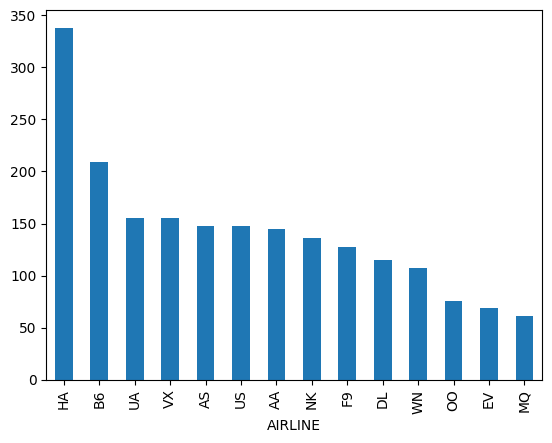

In [40]:
result.plot(kind='bar')

In [41]:
df.groupby('AIRLINE')[['ARR_DELAY', 'DEP_DELAY']].mean()

,ARR_DELAY,DEP_DELAY
AIRLINE,,
AA,5.542661,11.274057
AS,-0.833333,1.808594
B6,8.692593,14.287823
DL,0.339691,7.242450
EV,7.034580,9.092625
F9,13.630651,14.310398
HA,4.972973,2.571429
MQ,6.860591,11.094323
NK,18.436070,19.514401


In [ ]:
df.groupby('MONTH')['ARR_DELAY'].agg(['min', 'max'])

,min,max
MONTH,,
1,-57.0,732.0
2,-58.0,839.0
3,-47.0,589.0
4,-53.0,669.0
5,-51.0,692.0
6,-50.0,616.0
7,-46.0,858.0
8,-51.0,741.0
9,-48.0,623.0


In [44]:
df.groupby('MONTH')[['ARR_DELAY', 'DEP_DELAY']].agg(['min', 'max'])

ARR_DELAY         DEP_DELAY        
            min     max       min     max
MONTH                                    
1         -57.0   732.0     -24.0   751.0
2         -58.0   839.0     -20.0   852.0
3         -47.0   589.0     -19.0   596.0
4         -53.0   669.0     -20.0   672.0
5         -51.0   692.0     -16.0   702.0
6         -50.0   616.0     -19.0   617.0
7         -46.0   858.0     -22.0   835.0
8         -51.0   741.0     -18.0   755.0
9         -48.0   623.0     -17.0   640.0
11        -57.0   682.0     -20.0   684.0
12        -60.0  1185.0     -18.0  1194.0

## 복수열 기준 그룹핑

-   두개 이상의 열을 그룹으로 묶을 수 있다.
-   groupby의 매개변수에 그룹으로 묶을 컬럼들의 이름을 리스트로 전달한다.


In [46]:
df.groupby(['ORG_AIR', 'DEST_AIR'])["AIR_TIME"].mean().sort_values()

ORG_AIR  DEST_AIR
DEN      COS          17.103448
MSP      RST          18.461538
ORD      MKE          19.240876
IAH      CLL          20.217391
DFW      ACT          20.829787
                        ...    
         HNL         480.619048
ORD      HNL         504.500000
         OGG         509.333333
MSP      HNL         513.000000
ATL      HNL         546.800000
Name: AIR_TIME, Length: 1130, dtype: float64

## Group 별 집계결과에서 특정 조건의 항목만 조회

-   Groupby 집계 후 boolean indexing 처리한다.


In [ ]:
# 항공사별 취소 건수가 100건 이상인 항공사만 조회


# 사용자 정의 집계함수를 agg() 를 이용해 호출

## 사용자 정의 집계 함수 정의

-   매개변수
    1. Series 또는 DataFrame을 받을 매개변수(필수)
    2. 필요한 값을 받을 매개변수를 선언한다. (선택)
-   반환값
    -   집계결과값 반환


In [ ]:
###  최대 최소값의의 차이를 집계하는 사용자 정의 집계함수.
def min_max_diff(column):
    return column.max() - column.min()

In [ ]:
min_max_diff(df['AIR_TIME'])

In [ ]:
df['AIR_TIME'].agg(min_max_diff)

In [ ]:
df['AIR_TIME'].agg(["min", "max", min_max_diff])

In [ ]:
df[['DEP_DELAY', 'ARR_DELAY']].agg(min_max_diff)

# pivot_table()

엑셀의 pivot table 기능을 제공하는 메소드.  
분류별 집계(Group으로 묶어 집계)를 처리하는 함수로 group으로 묶고자 하는 컬럼들을 행과 열로 위치시키고 집계값을 값으로 보여준다.  
역할은 `groupby()`를 이용한 집계와 같은데 **여러개 컬럼을 기준으로 groupby 를 할 경우 집계결과를 읽는 것이 더 편하다.(가독성이 좋다)**

> pivot() 함수와 역할이 다르다.  
> pivot() 은 index와 column의 형태를 바꾸는 reshape 함수.

-   `DataFrame.pivot_table(values=None, index=None, columns=None, aggfunc='mean', fill_value=None, margins=False, dropna=True, margins_name='All')`
-   **매개변수**
    -   **index**
        -   문자열 또는 리스트. index로 올 컬럼들 => groupby였으면 묶었을 컬럼
    -   **columns**
        -   문자열 또는 리스트. column으로 올 컬럼들 => groupby였으면 묶었을 컬럼 (index/columns가 묶여서 groupby에 묶을 컬럼들이 된다.)
    -   **values**
        -   문자열 또는 리스트. 집계할 대상 컬럼들
    -   **aggfunc**
        -   집계함수 지정. 함수, 함수이름문자열, 함수리스트(함수이름 문자열/함수객체), dict: 집계할 함수
        -   기본(생략시): 평균을 구한다. (mean이 기본값)
    -   **fill_value, dropna**
        -   fill_value: 집계시 NA가 나올경우 채울 값
        -   dropna: boolean. 컬럼의 전체값이 NA인 경우 그 컬럼 제거(기본: True)
    -   **margins/margins_name**
        -   margin: boolean(기본: False). 총집계결과를 만들지 여부.
        -   margin_name: margin의 이름 문자열로 지정 (생략시 All)


### 두개의 컬럼을 grouping 해서 집계

-   항공사/출발공항코드 별 취소 총수 (1이 취소이므로 합계를 구한다.)
-   사용컬럼
    -   grouping할 컬럼
        -   AIRLINE: 항공사
        -   ORG_AIR: 출발 공항코드
    -   집계대상컬럼
        -   CANCELLED: 취소여부 - 1:취소, 0: 취소안됨
-   집계: sum


In [ ]:
df.groupby(["AIRLINE", "ORG_AIR"])['CANCELLED'].sum()

### 3개 이상의 컬럼을 grouping해서 집계

-   항공사/월/출발공항코드 별 취소 총수
-   grouping할 컬럼
    -   AIRLINE:항공사
    -   MONTH:월
    -   ORG_AIR: 출발지 공항
-   집계 대상컬럼
    -   CANCELLED: 취소여부
-   집계 : sum


In [ ]:
df.pivot_table(
    index="MONTH", 
    columns=["AIRLINE", "ORG_AIR"],
    values="CANCELLED",
    aggfunc="sum"
).T

# cut() - 연속형(수치형)을 범주형으로 변환

-   cut() : 지정한 값을 기준으로 구간을 나눠 그룹으로 묶는다.
    -   `pd.cut(x, bins,right=True, labels=None)`
    -   매개변수
        -   **x**: 범주형으로 바꿀 대상. 1차원 배열형태(Series, 리스트, ndarray)의 자료구조
        -   **bins**: 범주로 나눌때의 기준값(구간경계)들을 리스트로 묶어서 전달한다.
        -   **right**: 구간경계의 오른쪽(True-기본)을 포함할지 왼쪽(False)을 포함할지
        -   **labels**: 각 구간(범주)의 label을 리스트로 전달
            -   생략하면 범위를 범주명으로 사용한다. (ex: (10, 20], ()-포함안함, []-포함)


In [ ]:
import numpy as np
np.random.seed(0)
d = {
    "age": np.random.randint(1, 100, size=30),
    "tall": np.round(np.random.normal(170, 10, size=30), 2),
}
df = pd.DataFrame(d)
df

> ### np.random.normal(평균, 표준편차, size=개수): 정규분포를 따르는 난수 생성
> - 난수란 예측할 수 없고 일정한 규칙이 없는, 임의로 발생하는 수를 의미한다. 주로 통계적 분석이나 알고리즘에서 무작위성을 구현할 때 사용된다.
> - 특정 데이터 분포를 이용해 난수를 발생시키면, 해당 분포의 특성을 따르는 난수가 생성되도록 제어할 수 있다.
>   
> #### 데이터 분포
> - 분포의 사전적의미는 특정 범위나 구역 내에서 사물이나 현상이 퍼져 있는 상태를 의미
> - **데이터 분포는** 값들이 전체 범위 내에서 어떻게 퍼져 있는지를 나타내는 패턴이다. 이를 통해 데이터의 중심 경향, 변동성, 대칭성 등을 파악할 수 있다.
> #### 정규분포:
> - 정규분포는 데이터가 **평균을 중심으로 좌우 대칭**을 이루며 **종 모양의 분포**를 나타내는 확률 분포다. 평균 주변에 데이터들이 집중되고, 평균에서 멀어질수록 데이터의 빈도가 감소하는 특징을 가진다. 대표적인 예로 사람들의 키나 시험 점수가 정규분포를 따르는 경우가 많다.
> - 정규분포는 평균과 분산을 통해 표현된다.
> - 정규분포중 평균이 0이고 표준편차가 1인 것을 **표준 정규 분포** 라고 한다.
> - 정규분포를 이용한 난수
>     - 평균 +- 표준편차  범위: 대략 70% 분포됨.
>     - 평균 +- 표준편차 * 2 범위: 대략 95% 분포됨.
>     - 평균 +- 표준편차 * 3 범위: 대략 99% 분포됨.
> - ex)
>    - 평균: 170, 표준편차: 10, 100 개 난수 생성
>         - 160 ~ 180 : 70 개
>         - 150 ~ 190 : 95 개

In [ ]:
나이대 = pd.cut(
    df['age'],    # 범주형으로 만들 수치형값들.
    bins=3,       # 몇개의 범주로 나눌지. (범위로 등분)  
    right=False   #default: True -> 등분 범위에 어느쪽을 포함시킬지.  # True: 끝 포함, False: 시작 포함
)

In [ ]:
pd.DataFrame({"age": df['age'], "나이대":나이대})

In [ ]:
나이대.value_counts()

-   범위를 표현방식
    -   (시작값, 종료값), \[시작값, 종료값\] : 시작값 ~ 종료값
    -   () : opened - 불포함, [] : closed - 포함
    -   (100, 200): 100 ~ 200 (100, 200 불포함)
    -   \[100, 200\]: 100 ~ 200 (100, 200 포함)
    -   (100, 200]: 100 ~ 200 (100: 불포함, 200 포함)


In [ ]:
나이대 = pd.cut(
    df['age'],   # 범주형으로 만들 수치형값들.
    bins=3,      # 몇개의 범주로 나눌지. (범위로 등분)     
    labels=["나이대1", "나이대2", "나이대3"] # 범주값 지정.
)
나이대

In [ ]:
### 원하는 간격으로 범주값들을 나누기.

l = [1, 5, 20, 40, 50, 100]   # 최소값, 분위값들(나누는 지점의 값), 최대값
                              # 0 ~ 5, 5 ~ 20, 20 ~ 40, 40 ~ 50, 50 ~ 100
result = pd.cut(df['age'], bins=l, labels=["유아", "청소년", "청년", "장년", "노년"])
result

In [ ]:
result_tall = pd.cut(df['tall'], bins=3, labels=["소", "중", "대"])
result_tall

In [ ]:
df.insert(1, "나이대", result)
df.head()

In [ ]:
df['키크기'] = result_tall
df.head()

In [ ]:
df.groupby("나이대")['tall'].mean()

In [ ]:
df.groupby('키크기')['age'].mean()

# apply() - Series, DataFrame의 데이터 일괄 처리

데이터프레임의 행들과 열들 또는 Series의 원소들에 공통된 처리를 할 때 apply 함수를 이용하면 반복문을 사용하지 않고 일괄 처리가 가능하다.

-   DataFrame.apply(함수, axis=0, args=(), \*\*kwarg)
    -   인수로 행이나 열을 받는 함수를 apply 메서드의 인수로 넣으면 데이터프레임의 행이나 열들을 하나씩 함수에 전달한다.
    -   매개변수
        -   **함수**: DataFrame의 행들 또는 열들을 전달할 함수
        -   **axis**: **0-컬럼(열)을 전달, 1-행을 전달 (기본값 0)**
        -   **args**: 함수에 행/열 이외에 전달할 매개변수를 위치기반(순서대로) 튜플로 전달
        -   **\*\*kwarg**: 함수에 행/열 이외에 전달할 매개변수를 키워드 인자로 전달
-   Series.apply(함수, args=(), \*\*kwarg)
    -   인수로 Series의 원소들을 받는 함수를 apply 메소드의 인수로 넣으면 Series의 원소들을 하나씩 함수로 전달한다.
    -   매개변수
        -   **함수**: Series의 원소들을 전달할 함수
        -   **args**: 함수에 원소 이외에 전달할 매개변수를 위치기반(순서대로) 튜플로 전달
        -   **\*\*kwarg**: 함수에 원소 이외에 전달할 매개변수를 키워드 인자로 전달


In [1]:
import pandas as pd
df = pd.read_csv("data/flights.csv")
df.columns

Index(['MONTH', 'DAY', 'WEEKDAY', 'AIRLINE', 'ORG_AIR', 'DEST_AIR',
       'SCHED_DEP', 'DEP_DELAY', 'AIR_TIME', 'DIST', 'SCHED_ARR', 'ARR_DELAY',
       'DIVERTED', 'CANCELLED'],
      dtype='object')

In [2]:
# 요일: 1 (월), 7 (일)
df['WEEKDAY'].value_counts().sort_index()

WEEKDAY
1    8720
2    8535
3    8706
4    8659
5    8453
6    7052
7    8367
Name: count, dtype: int64

In [ ]:
"월화수목금토일"[1]

In [ ]:
# 일괄처리 함수 (정수->요일 문자열로 변환)
import numpy as np
def convert_weekday(value):
    if pd.isna(value):
        return np.nan
    return "월화수목금토일"[value-1]+"요일"

In [4]:
df['WEEKDAY'].apply(convert_weekday)[150:160]

150    금요일
151    금요일
152    금요일
153    금요일
154    금요일
155    금요일
156    금요일
157    금요일
158    금요일
159    금요일
Name: WEEKDAY, dtype: object

In [6]:
df2 = df.copy()
df2['WEEKDAY'] = df2['WEEKDAY'].apply(convert_weekday)
df2.head()

,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
0,1,1,목요일,WN,LAX,SLC,1625,58.0,94.0,590,1905,65.0,0,0
1,1,1,목요일,UA,DEN,IAD,823,7.0,154.0,1452,1333,-13.0,0,0
2,1,1,목요일,MQ,DFW,VPS,1305,36.0,85.0,641,1453,35.0,0,0
3,1,1,목요일,AA,DFW,DCA,1555,7.0,126.0,1192,1935,-7.0,0,0
4,1,1,목요일,WN,LAX,MCI,1720,48.0,166.0,1363,2225,39.0,0,0


In [5]:
df['WEEKDAY'].apply(lambda x : "월화수목금토일"[x-1]+"요일")

0        목요일
1        목요일
2        목요일
3        목요일
4        목요일
        ... 
58487    목요일
58488    목요일
58489    목요일
58490    목요일
58491    목요일
Name: WEEKDAY, Length: 58492, dtype: object